<h1><center>LOG6953C - TP3</center></h1>

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
# import basic plot tools
from qiskit.visualization import plot_histogram
import re

Question 1

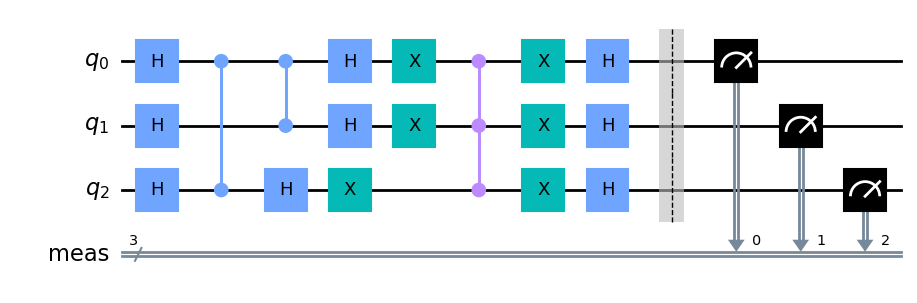

In [44]:
grover_circuit = QuantumCircuit(3)
# grover_circuit = initialize_s(grover_circuit, [0,1,2])
for q in [0, 1, 2]:
    grover_circuit.h(q)
grover_circuit.cz(2, 0)
grover_circuit.cz(1, 0)

for qubit in range(3):
    grover_circuit.h(qubit)
# Apply transformation |00..0> -> |11..1> (X-gates)
for qubit in range(3):
    grover_circuit.x(qubit)
# Do multi-controlled-Z gate
grover_circuit.ccz(2,1,0)
# Apply transformation |11..1> -> |00..0>
for qubit in range(3):
    grover_circuit.x(qubit)
# Apply transformation |00..0> -> |s>
for qubit in range(3):
    grover_circuit.h(qubit)
grover_circuit.measure_all()
grover_circuit.draw(output='mpl')

In [45]:
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-03-21 15:11:59,814: Credentials are already in use. The existing account in the session will be replaced.


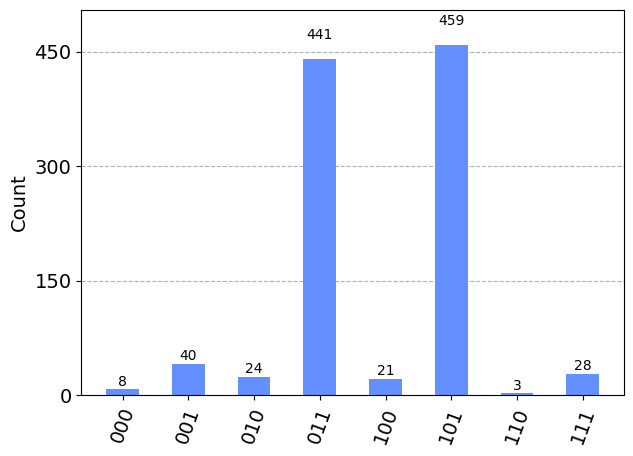

In [46]:
# Run 3 qubit Grover on Fake Nairobi noisy simulator
from qiskit import execute
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeNairobi
device_backend = FakeNairobi()
sim_nairo = AerSimulator.from_backend(device_backend)
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, sim_nairo, optimization_level=3)
job=execute(grover_circuit, sim_nairo, shots=1024)
# Get the results from the computation,
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

Question 2

In [35]:
def cz_to_hcnoth(codeline:str,number:int):
    if re.search('prog.cz', codeline) is not None:
        new_codeline = re.sub("# number=(.*)[\n]", "", codeline)
        return re.sub('cz[(](.*)[,]', "h(", new_codeline)+"# number="+str(number)+"\n"+\
               re.sub('cz', "cx", new_codeline)+"# number="+str(number+1)+"\n"+\
               re.sub('cz[(](.*)[,]',"h(", new_codeline)+"# number="+str(number+2)+"\n"
    else:
        raise Exception('No CZ gate for CNOT transformation')

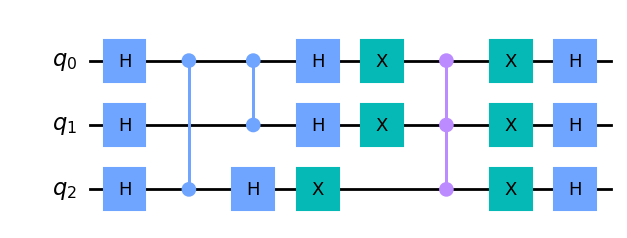

In [36]:
from gates_equivalent import cz_to_hcnoth

circuit = '''prog = QuantumCircuit(3)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

for qubit in range(3):
    prog.h(qubit)
    
for qubit in range(3):
    prog.x(qubit)

prog.ccz(2,1,0)

for qubit in range(3):
    prog.x(qubit)
    
for qubit in range(3):
    prog.h(qubit)
    '''
exec(circuit)
prog.draw(output='mpl')

# print(cz_to_hcnoth(circuit, 0))

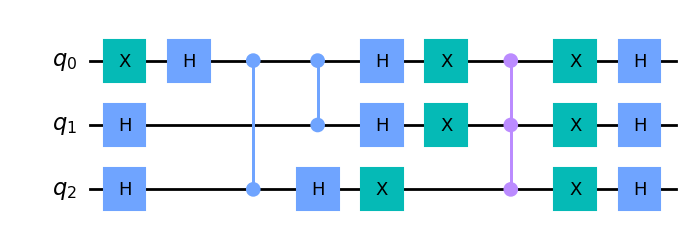

In [41]:

circuit = '''prog = QuantumCircuit(3)

prog.x(0)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

for qubit in range(3):
    prog.h(qubit)

for qubit in range(3):
    prog.x(qubit)

prog.ccz(2,1,0)

for qubit in range(3):
    prog.x(qubit)
    
for qubit in range(3):
    prog.h(qubit)
    '''
exec(circuit)
prog.draw(output='mpl')

In [37]:
search_sequence = 'prog.cz'

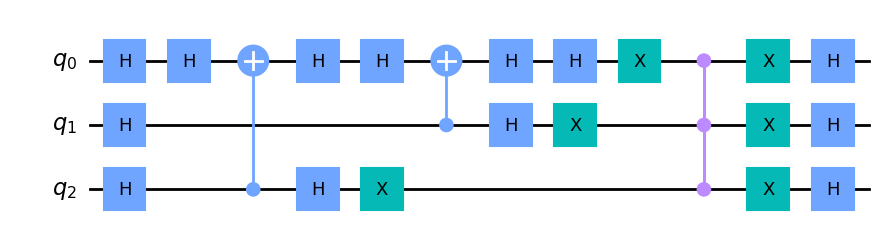

In [38]:
lines = circuit.splitlines()
mutant = ""
for i, line in enumerate(lines):
    if search_sequence in line:
        mutant+='\n'+cz_to_hcnoth(line,i)
    else :
        mutant+='\n'+line
exec(mutant)
prog.draw(output='mpl')